# Criando conjunto de dados para treinamento e teste

In [ ]:
!pip install kagglehub[pandas-datasets]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import kagglehub
from kagglehub import KaggleDatasetAdapter

In [8]:
import numpy as np

In [2]:
# Título do arquivo a ser descarregado
file_path = "Country-data.csv"

In [3]:
# Coleta de dados e armazenamento em dataframe Pandas
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,"rohan0301/unsupervised-learning-on-country-data",file_path)

/tmp/ipython-input-1491118882.py:2: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,"rohan0301/unsupervised-learning-on-country-data",file_path)


100%|██████████| 9.01k/9.01k [00:00<00:00, 6.24MB/s]


In [4]:
df.shape

(167, 10)

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# Criar uma variável alvo simples baseada na expectativa de vida
df['life_category'] = pd.cut(df['life_expec'], bins=3, labels=['baixa', 'média', 'alta'])

In [9]:
# Separar features (X) e target (y)
X = df.select_dtypes(include=[np.number]).drop(['life_expec'], axis=1)
y = df['life_category']

In [10]:
y.head()

,life_category
0,média
1,alta
2,alta
3,média
4,alta


## Divisão simples

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Identificando balanceamento das classes

In [12]:
# Verificar distribuição das classes em percentual
y.value_counts(normalize=True)

,proportion
life_category,
alta,0.718563
média,0.263473
baixa,0.017964


Text(0.5, 1.0, 'Distribuição das Classes')

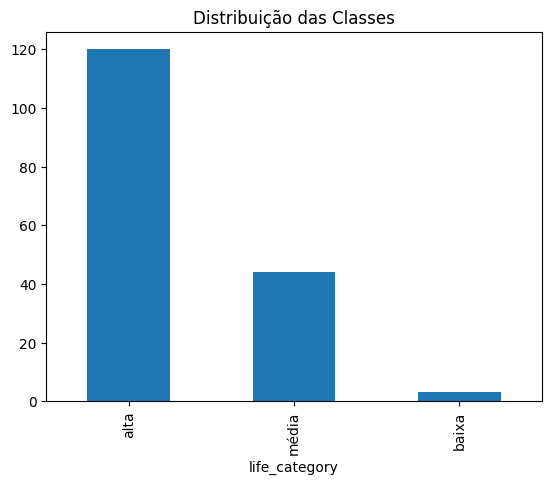

In [13]:
y.value_counts().plot(kind='bar')
plt.title('Distribuição das Classes')

In [18]:
# Com estratificação (para classes desbalanceadas)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
X_test.shape

(34, 8)

In [20]:
X_train.shape

(133, 8)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Text(0.5, 1.0, 'Distribuição das Classes')

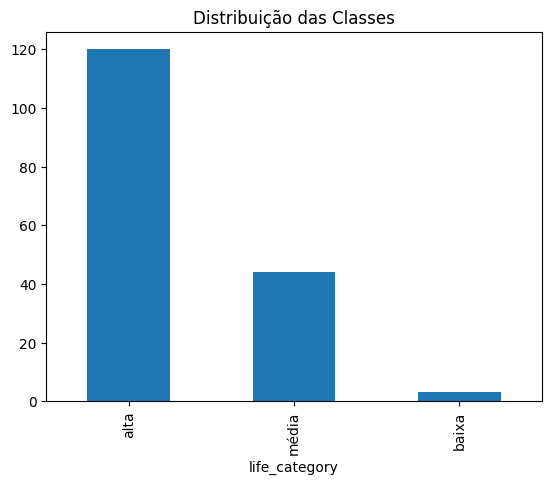

In [22]:
y.value_counts().plot(kind='bar')
plt.title('Distribuição das Classes')